# TensorFlow 2 quickstart for beginners

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import h5py              as h5
import tensorflow        as tf
tf.enable_eager_execution()

from glob import glob

/home/frederik/software/Anaconda3/installation/envs/magritte/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/frederik/software/Anaconda3/installation/envs/magritte/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/frederik/software/Anaconda3/installation/envs/magritte/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.d

Load the data.

In [2]:
datafile = glob('data/*1000000_*')[0]

In [3]:
with h5.File(datafile, 'r') as file:
    inputs = np.array(file['inputs'])
    target = np.array(file['target'])

In [4]:
D = inputs.shape[1]//4

In [5]:
z    = inputs[:,      :  D  ]
dz   = inputs[:,   D  :2*D-1]
eta  = inputs[:, 2*D-1:3*D-1]
chi  = inputs[:, 3*D-1:4*D-1]
Ibdy = inputs[:, 4*D-1:4*D  ]

In [34]:
dtau = 0.5 * (chi + np.roll(chi,1))[:,1:] * dz

In [7]:
inputs = np.concatenate((dtau, eta, Ibdy), axis=1)

In [45]:
I = Ibdy[0][0] * np.exp(-np.sum(dtau[0,:]))

In [46]:
I += np.sum(np.exp(-np.cumsum(dtau[0,:])) * eta[0,1:] * dz[0,:])

In [47]:
I

0.9618045835450784

In [44]:
target[0]

0.965698630757146

In [52]:
model(inputs).numpy()[0]

array([0.98201215], dtype=float32)

In [8]:
inputs.shape

(904000, 128)

Split data into a training set and a validation set.

In [9]:
N_valid = 1000

inputs_valid = inputs[:N_valid]
target_valid = target[:N_valid]

inputs_train = inputs[N_valid:]
target_train = target[N_valid:]

In [10]:
(N, W) = inputs_train.shape

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=W, activation='linear'),
    tf.keras.layers.Dense(128,              activation='tanh'),
    tf.keras.layers.Dense(128,              activation='tanh'),
    tf.keras.layers.Dense(128,              activation='tanh'),
    tf.keras.layers.Dense(  1,              activation='linear')
])

In [20]:
model.compile(
    optimizer = 'adam',
    loss      = tf.keras.losses.MeanAbsoluteError(),
    metrics   = ['mse']
)

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [21]:
model.fit(
    x                   = inputs_train,
    y                   = target_train,
    batch_size          = 50,
    epochs              = 5,
    validation_data     = (inputs_valid, target_valid),
    use_multiprocessing = True
)

Train on 903000 samples, validate on 1000 samples
Epoch 1/5
903000/903000 [==============================] - 10s 11us/sample - loss: 0.0251 - mean_squared_error: 0.0020 - val_loss: 0.0231 - val_mean_squared_error: 8.4072e-04
Epoch 2/5
903000/903000 [==============================] - 10s 11us/sample - loss: 0.0164 - mean_squared_error: 4.8099e-04 - val_loss: 0.0133 - val_mean_squared_error: 3.0562e-04
Epoch 3/5
903000/903000 [==============================] - 10s 11us/sample - loss: 0.0146 - mean_squared_error: 3.8558e-04 - val_loss: 0.0120 - val_mean_squared_error: 2.4909e-04
Epoch 4/5
903000/903000 [==============================] - 11s 12us/sample - loss: 0.0136 - mean_squared_error: 3.3487e-04 - val_loss: 0.0112 - val_mean_squared_error: 2.2160e-04
Epoch 5/5
903000/903000 [==============================] - 10s 11us/sample - loss: 0.0136 - mean_squared_error: 4.0198e-04 - val_loss: 0.0137 - val_mean_squared_error: 2.9297e-04


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [22]:
model.evaluate(
    x                   = inputs_valid,
    y                   = target_valid,
    use_multiprocessing = True
)

1000/1000 [==============================] - 0s 65us/sample - loss: 0.0137 - mean_squared_error: 2.9297e-04


[0.013718810945749282, 0.00029296623]

In [23]:
prediction_valid = model(inputs_valid).numpy().ravel()

In [24]:
error = np.abs((prediction_valid - target_valid) / (prediction_valid + target_valid))

In [25]:
np.max(error)

0.055844930863573713

In [26]:
np.mean(error)

0.011237810633166374

(256, 64)
(64, 32)
(32, 16)
(16, 1)


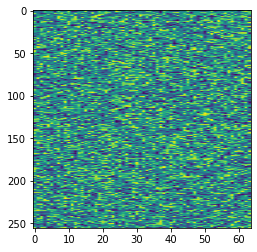

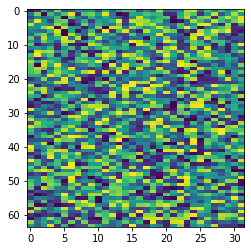

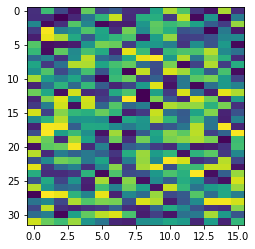

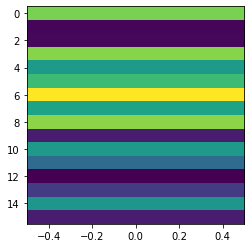

In [20]:
weights = model.get_weights()

for weight in weights[::2]:
    print(weight.shape)
    plt.figure()
    plt.imshow(weight, aspect=weight.shape[1]/weight.shape[0])

In [10]:
target[:10]

NameError: name 'target' is not defined

In [9]:
training_target

array([0.63921731, 0.76976893, 0.58893777, ..., 0.48352942, 1.02023499,
       0.32612969])